In [148]:
!pip install joypy

In [149]:
import json
import numpy as np
import pandas as pd
import requests
from joypy import joyplot
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Reading Covid-19 Data

In [150]:
# URL = "https://api.covid19india.org/data.json"
# result = requests.get(URL).json()
# df = pd.DataFrame(result["cases_time_series"])
# df.to_excel("data.xlsx", index=False)

In [151]:
df = pd.read_excel("data.xlsx")

In [152]:
df.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,dateymd,totalconfirmed,totaldeceased,totalrecovered,Month
0,78168,892,62145,01 September,2020-09-01,3766121,66337,2899515,September
1,82860,913,67874,02 September,2020-09-02,3848981,67250,2967389,September
2,84156,979,67491,03 September,2020-09-03,3933137,68229,3034880,September
3,87115,950,69625,04 September,2020-09-04,4020252,69179,3104505,September
4,90600,916,73161,05 September,2020-09-05,4110852,70095,3177666,September


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dailyconfirmed  91 non-null     int64         
 1   dailydeceased   91 non-null     int64         
 2   dailyrecovered  91 non-null     int64         
 3   date            91 non-null     object        
 4   dateymd         91 non-null     datetime64[ns]
 5   totalconfirmed  91 non-null     int64         
 6   totaldeceased   91 non-null     int64         
 7   totalrecovered  91 non-null     int64         
 8   Month           91 non-null     object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 6.5+ KB


In [154]:
df["dateymd"] = pd.to_datetime(df["dateymd"])

In [155]:
df["Month"] = df["dateymd"].dt.month_name()
df["dailyconfirmed"] = df["dailyconfirmed"].astype(int)
df["dailyrecovered"] = df["dailyrecovered"].astype(int)

In [156]:
cat_month = CategoricalDtype(
    [ 'September','October', 'November'])

In [157]:
df['Month'] = df['Month'].astype(cat_month)

# Creating a Ridgeline Plot

<Figure size 432x288 with 0 Axes>

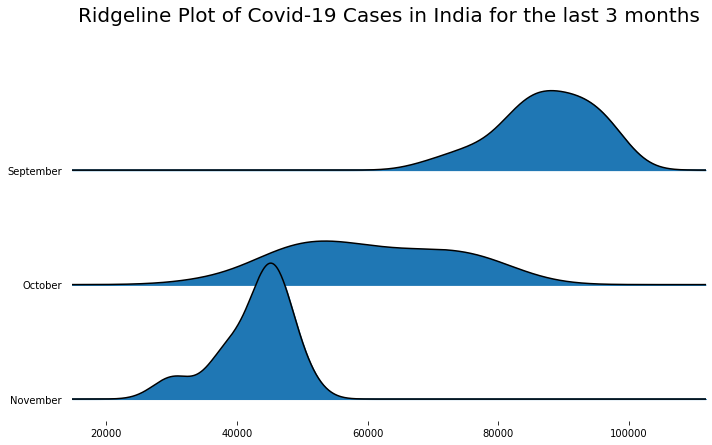

In [158]:
plt.figure()

joyplot(
    data=df[['dailyconfirmed', 'Month']], 
    by='Month',
    figsize=(10, 6)
)
plt.title('Ridgeline Plot of Covid-19 Cases in India for the last 3 months', fontsize=20)
plt.show()

# Ridgeline plot for multiple variables

<Figure size 432x288 with 0 Axes>

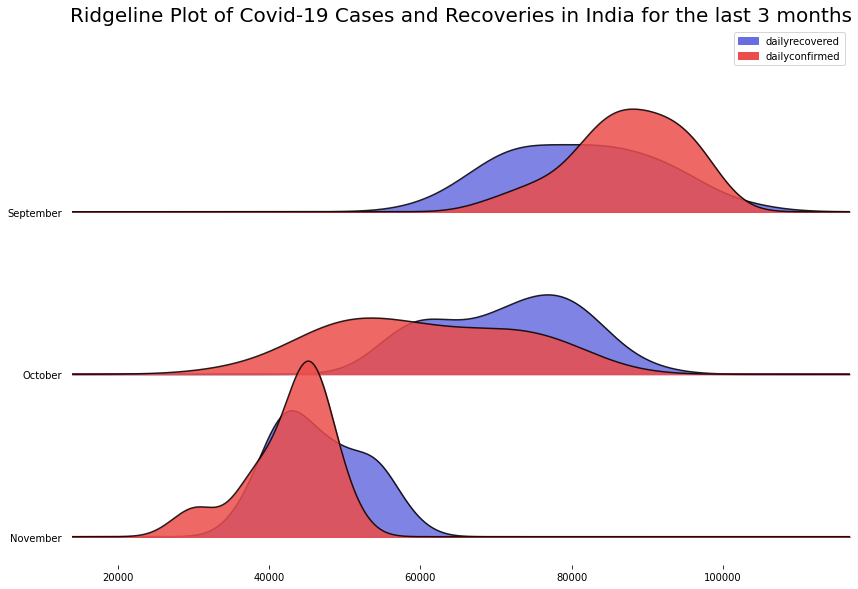

In [159]:
plt.figure()

ax, fig = joyplot(
     data=df[['dailyrecovered', 'dailyconfirmed', 'Month']], 
      by='Month',
      figsize=(12, 8),
      column=['dailyrecovered', 'dailyconfirmed'],
      color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
)
plt.title('Ridgeline Plot of Covid-19 Cases and Recoveries in India for the last 3 months', fontsize=20)
plt.show()